Customer Churn Prediction Using Artifical Neural Network (ANN)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Load the data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1476,5067-DGXLL,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,36.8,No
1984,4373-MAVJG,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),90.90,1259,Yes
6946,9013-AQORL,Female,0,No,Yes,48,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
3954,7225-CBZPL,Male,1,Yes,No,17,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.80,1563.9,No
3779,8631-NBHFZ,Male,1,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.40,5154.6,Yes


First of all, Drop customerID columns as it is of no use

In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Quicl glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this colulmn

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

some values seems to be not numbers but blank strin. Let's find out such rows

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

Remoe rows with space in TotalCharges

In [13]:
df1 = df[df.TotalCharges!='']
df1.shape

(7043, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [16]:
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Data Visualization

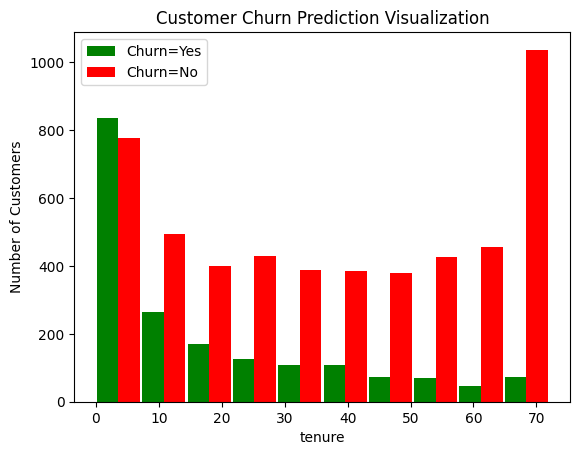

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])

plt.legend()

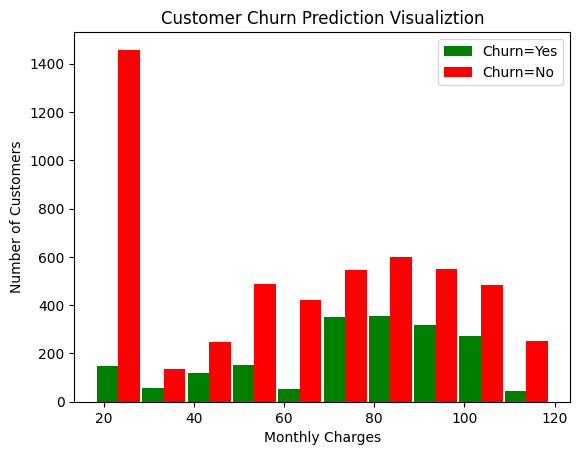

In [20]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualiztion')

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [21]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique}')

In [22]:
print_unique_col_values(df1)

gender: <bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>
Partner: <bound method Series.unique of 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object>
Dependents: <bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object>
PhoneService: <bound method Series.unique of 0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object>
MultipleLines: <bound method Series.unique of 0       No phone service
1                 

Some of the columns have no internet seevice or no phone sevice, that can be replaced with a simple No

In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: <bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>
Partner: <bound method Series.unique of 0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object>
Dependents: <bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object>
PhoneService: <bound method Series.unique of 0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object>
MultipleLines: <bound method Series.unique of 0        No
1        No
2        No
3      

Convert Yes and No to 1 or 0

In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0], dtype=int64)

One hot encoding for categorical columns

In [29]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4457,0,0,1,1,22,1,0,1,0,0,...,False,True,False,True,False,False,True,False,False,False
6152,1,0,0,0,16,1,0,0,1,1,...,False,True,False,True,False,False,False,True,False,False
2800,1,0,1,1,20,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
5379,1,0,1,0,56,1,1,1,0,0,...,False,True,False,False,True,False,False,False,True,False
2769,1,0,0,0,15,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

ValueError: could not convert string to float: ' '

In [33]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]
InternetService_DSL:[ True False]
InternetService_Fiber optic:[False  True]
InternetService_No:[False  True]
Contract_Month-to-month:[ True False]
Contract_One year:[False  True]
Contract_Two year:[False  True]
PaymentMethod_Bank transfer (automatic):[False  True]
PaymentMethod_Credit card (automatic):[False  True]
PaymentMethod_Electronic check:[ True False]
PaymentMethod_Mailed

Train test split

In [34]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
x_train.shape

(5634, 26)

In [37]:
x_test.shape

(1409, 26)

In [38]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5860,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,True,False,False,False
2458,0,1,1,0,50,1,1,1,0,1,...,False,True,False,False,False,True,False,True,False,False
5879,0,0,1,0,33,1,0,1,1,0,...,True,False,False,False,False,True,False,False,False,True
4708,1,0,1,1,56,1,0,1,1,1,...,True,False,False,False,False,True,False,True,False,False
1293,0,0,1,1,67,1,1,0,1,1,...,False,True,False,False,False,True,True,False,False,False
2242,0,0,1,1,44,1,1,0,0,0,...,False,False,True,False,True,False,False,False,True,False
1444,0,0,0,1,41,1,0,1,1,1,...,False,True,False,False,False,True,False,False,True,False
3269,0,0,0,0,65,1,1,0,0,0,...,False,False,True,False,True,False,False,True,False,False
101,1,0,1,1,1,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
4191,1,0,1,0,63,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False


In [39]:
len(x_train.columns)

26

In [42]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [43]:
model.evaluate(x_test,y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [44]:
yp = model.predict(x_test)
yp[:5]

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [45]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

NameError: name 'yp' is not defined

In [46]:
y_pred[:10]

[]

In [47]:
y_test[:10]

4213    1
5035    0
3713    1
1720    0
234     0
4558    1
40      0
3455    1
5944    1
1089    0
Name: Churn, dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1409, 0]

In [49]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [1409] != values[1].shape = [0] [Op:Pack] name: stack

In [50]:
y_test.shape

(1409,)

Accuracy

In [51]:
round((862+229)/(862+229+137+179),2)

0.78

Precision for 0 class. i.e. Precision for customers who did not churn

In [52]:
round(229/(229+137),2)

0.63

Recall for 0 class

In [53]:
round(862/(862+137),2)

0.86

In [54]:
round(229/(229+179),2)

0.56